# Geolocation Data

Geospatial information is data that is referenced by spatial or geographic coordinates. The data that we will be working with in this lesson is vector data - features that are represented by points, lines, and polygons. <br>
 - **Points** are defined by a pair of (x,y) coordinates. They usually represent locations, place names, and other objects on the ground.
 - **Lines** are the connection between two points. They can have properties such as length, direction, flow, etc.
 - **Polygons** are a series of lines connected together to form a shape. They can have properties such as area, perimeters, and centroids. 
 
In this notebook, you will need to install the [geopandas](https://anaconda.org/conda-forge/geopandas) and [geoPy](https://anaconda.org/conda-forge/geopy) libraries. Also, download [this text file](https://automating-gis-processes.github.io/CSC18/_static/data/L3/addresses.txt) to use in the example code below.

In [6]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

### Geocoding and Reverse Geocoding

Geocoding is taking an address for a location and returning its latitudinal and longitudinal coordinates. Reverse geocoding would then be the opposite - taking the latitudinal and longitudinal coordinates for a location and returning the physical address.

In [7]:
#take an address and return coordinates
#returned variable is a geo-dataframe with 2 columns, geometry (the geographical shape) and the full physical address
ex1_geo = geocode("12 South Summit Avenue, Gaithersburg, MD", provider='nominatim')
ex1_geo

,geometry,address
0,POINT (-77.19392100403969 39.14089855),"12, South Summit Avenue, Gaithersburg, Montgom..."


In [8]:
#structure of full address
#each API structures addresses differently
ex1_geo['address'].iloc[0]

'12, South Summit Avenue, Gaithersburg, Montgomery County, Maryland, 20877, USA'

In [9]:
#use latitude and longitude to get physical address
#pass through using Point geometry
#also returns geo-dataframe with geometry and full physical address
ex2_geo = reverse_geocode([Point(-77.15879730243169, 39.0985195)], provider='nominatim')
ex2_geo

,geometry,address
0,POINT (-77.15879730243169 39.0985195),"Montgomery College, 51, Mannakee Street, Westm..."


#### Geocode a Dataframe column

In [10]:
#dataset of addresses in Finland
location = r"./datasets/addresses.txt"

#load data into dataframe
#seperator between values in file is a semicolon
finland_df = pd.read_csv(location, sep=";")
finland_df.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


In [11]:
#geocode an entire column in a dataframe
geo_addr = geocode(finland_df['addr'], provider='nominatim')

In [17]:
type(geo_addr)

geopandas.geodataframe.GeoDataFrame

In [12]:
#first 5 rows of geo-dataframe of Finland addresses
geo_addr.head()

,geometry,address
0,POINT (24.9155624 60.1632015),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns..."
1,POINT (24.9316914 60.1690222),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."
2,POINT (24.9416849 60.1699637),"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel..."
3,POINT (24.9740738 60.1956039),"Hermannin rantatie, Kyläsaari, Hermanni, Helsi..."
4,POINT (24.9216003 60.1566475),"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län..."


In [13]:
#add the geometry column (coordinates) to the original dataframe 
finland_df['geo_addr'] = geo_addr['geometry']
finland_df.head()

,id,addr,geo_addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.9155624 60.1632015)
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.9316914 60.1690222)
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.9416849 60.1699637)
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.9740738 60.1956039)
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.9216003 60.1566475)


In [18]:
type(finland_df)

pandas.core.frame.DataFrame

### NASA Meteorite Landings

At the end of your notebook for the NASA Meteorite data exercise, add a new cell with the code `df.to_csv("datasets/NASAmeteorite.csv")`. Run that cell to create a csv file of your meteorite data to use in the following examples. Then [download the `continents.json` GeoJSON file](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv2%20Data%20Analytics) for the world map that will be charted.

In [23]:
#load meteorite data collected from NASA Open Data API
meteor_df = pd.read_csv(r"./datasets/NASAmeteorite.csv", encoding = "latin-1")
meteor_df.head()

,Unnamed: 0,ID,Year,Fall,Name,Nametype,Mass,Latitude,Longitude
0,0,1,1880-01-01T00:00:00.000,Fell,Aachen,Valid,21.0,50.77500,6.08333
1,1,2,1951-01-01T00:00:00.000,Fell,Aarhus,Valid,720.0,56.18333,10.23333
2,2,6,1952-01-01T00:00:00.000,Fell,Abee,Valid,107000.0,54.21667,-113.00000
3,3,10,1976-01-01T00:00:00.000,Fell,Acapulco,Valid,1914.0,16.88333,-99.90000
4,4,370,1902-01-01T00:00:00.000,Fell,Achiras,Valid,780.0,-33.16667,-64.95000


In [24]:
#data type of each column
meteor_df.dtypes

Unnamed: 0      int64
ID              int64
Year           object
Fall           object
Name           object
Nametype       object
Mass          float64
Latitude      float64
Longitude     float64
dtype: object

In [26]:
#only dataframe with non-null year column values
meteor_df = meteor_df.loc[meteor_df['Year'].notnull()]

#change year column into a string
#need to use string type for getYear function below
meteor_df['Year'] = meteor_df['Year'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
#function to split apart the date from the timestamp
def getYear(col):
    #get YYYY-MM-DD value
    date = col.split("T")[0]
    
    #extract year from date
    dt = datetime.strptime(date, '%Y-%m-%d')
    return dt.year

In [29]:
#replace the year timestamp data with only the year (using the getYear function)
meteor_df['Year'] = meteor_df['Year'].apply(getYear)
meteor_df.head()

,Unnamed: 0,ID,Year,Fall,Name,Nametype,Mass,Latitude,Longitude
0,0,1,1880,Fell,Aachen,Valid,21.0,50.77500,6.08333
1,1,2,1951,Fell,Aarhus,Valid,720.0,56.18333,10.23333
2,2,6,1952,Fell,Abee,Valid,107000.0,54.21667,-113.00000
3,3,10,1976,Fell,Acapulco,Valid,1914.0,16.88333,-99.90000
4,4,370,1902,Fell,Achiras,Valid,780.0,-33.16667,-64.95000


In [30]:
#see columns with null values
meteor_df.count()

Unnamed: 0    999
ID            999
Year          999
Fall          999
Name          999
Nametype      999
Mass          971
Latitude      987
Longitude     987
dtype: int64

In [32]:
#only include rows with non-null latitudes (which means longitude is also not null) and non-null mass
meteor_df = meteor_df.loc[(meteor_df['Latitude'].notnull()) & meteor_df['Mass'].notnull()]
meteor_df.count()

Unnamed: 0    959
ID            959
Year          959
Fall          959
Name          959
Nametype      959
Mass          959
Latitude      959
Longitude     959
dtype: int64

In [33]:
#make a new column to hold the longitude & latitude as a list
meteor_df['coordinates'] = list(meteor_df[['Longitude', 'Latitude']].values)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
#see new coordinates column
meteor_df.head()

,Unnamed: 0,ID,Year,Fall,Name,Nametype,Mass,Latitude,Longitude,coordinates
0,0,1,1880,Fell,Aachen,Valid,21.0,50.77500,6.08333,"[6.08333, 50.775]"
1,1,2,1951,Fell,Aarhus,Valid,720.0,56.18333,10.23333,"[10.23333, 56.183330000000005]"
2,2,6,1952,Fell,Abee,Valid,107000.0,54.21667,-113.00000,"[-113.0, 54.21666999999999]"
3,3,10,1976,Fell,Acapulco,Valid,1914.0,16.88333,-99.90000,"[-99.9, 16.883329999999997]"
4,4,370,1902,Fell,Achiras,Valid,780.0,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [35]:
#list values in coordinates column is classified as object type
meteor_df['coordinates'].dtypes

dtype('O')

In [36]:
#convert the coordinates to a geolocation type
meteor_df['coordinates'] = meteor_df['coordinates'].apply(Point)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
#coordinates column now has POINT next to each coordinate pair value
meteor_df.head()

,Unnamed: 0,ID,Year,Fall,Name,Nametype,Mass,Latitude,Longitude,coordinates
0,0,1,1880,Fell,Aachen,Valid,21.0,50.77500,6.08333,POINT (6.08333 50.775)
1,1,2,1951,Fell,Aarhus,Valid,720.0,56.18333,10.23333,POINT (10.23333 56.18333000000001)
2,2,6,1952,Fell,Abee,Valid,107000.0,54.21667,-113.00000,POINT (-113 54.21666999999999)
3,3,10,1976,Fell,Acapulco,Valid,1914.0,16.88333,-99.90000,POINT (-99.90000000000001 16.88333)
4,4,370,1902,Fell,Achiras,Valid,780.0,-33.16667,-64.95000,POINT (-64.95 -33.16667)


In [38]:
#coordinates column with geolocation data is just a regular pandas Series type
type(meteor_df['coordinates'])

pandas.core.series.Series

In [51]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_meteor = gpd.GeoDataFrame(meteor_df, geometry='coordinates')

In [40]:
#geo-dataframe looks the same as regular dataframe
geo_meteor.head()

,Unnamed: 0,ID,Year,Fall,Name,Nametype,Mass,Latitude,Longitude,coordinates
0,0,1,1880,Fell,Aachen,Valid,21.0,50.77500,6.08333,POINT (6.08333 50.775)
1,1,2,1951,Fell,Aarhus,Valid,720.0,56.18333,10.23333,POINT (10.23333 56.18333000000001)
2,2,6,1952,Fell,Abee,Valid,107000.0,54.21667,-113.00000,POINT (-113 54.21666999999999)
3,3,10,1976,Fell,Acapulco,Valid,1914.0,16.88333,-99.90000,POINT (-99.90000000000001 16.88333)
4,4,370,1902,Fell,Achiras,Valid,780.0,-33.16667,-64.95000,POINT (-64.95 -33.16667)


In [41]:
#verify coordinates column is geolocation dataframe type
type(geo_meteor['coordinates'])

geopandas.geoseries.GeoSeries

In [47]:
#import file that contains a world map shape polygons
#will use to plot the coordinates of meteorite landings
filepath = "./datasets/datasets_continents.json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,CONTINENT,geometry
0,Asia,(POLYGON ((93.27554321289063 80.26361083984375...
1,North America,(POLYGON ((-25.28166961669922 71.3916625976562...
2,Europe,(POLYGON ((58.06137847900391 81.68775939941406...
3,Africa,(POLYGON ((0.694651007652283 5.773365020751953...
4,South America,(POLYGON ((-81.71305847167969 12.4902763366699...


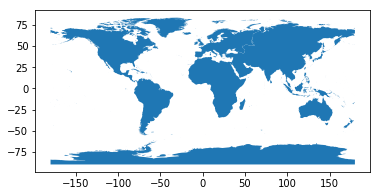

In [48]:
#map graph
map_df.plot()

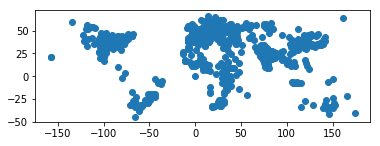

In [49]:
#plot the coordinates (no map)
geo_meteor.plot()

Text(0.5, 1.0, 'NASA Meteorite Landings')

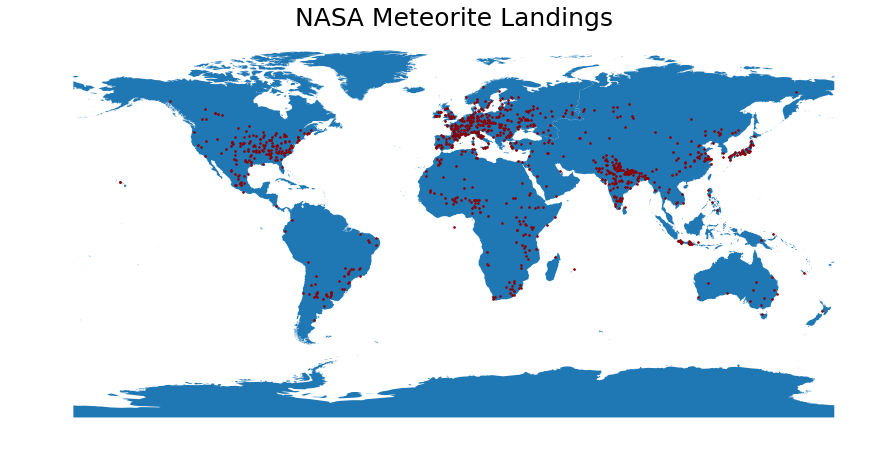

In [50]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map_df.plot(ax=ax)

#plot coordinates on top of map graph
geo_meteor.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("NASA Meteorite Landings", fontsize=25, fontweight=3)